<a href="https://colab.research.google.com/github/varundeepAvi/Assignments/blob/main/28mar_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: The objective of this project is to predict the likelihood of an individual developing diabetes using logistic regression based on various health and lifestyle factors. The dataset used for this analysis contains information about several attributes such as age, BMI (Body Mass Index), blood pressure, glucose levels, and family history of diabetes among others. Dataset Description:Age: Age of the individual (in years).BMI: Body Mass Index, a measure of body fat based on height and weight.Blood Pressure: Systolic and diastolic blood pressure values.Glucose: Blood glucose level.Outcome: Target variable indicating whether the individual has been diagnosed with diabetes (1 for yes, 0 for no).

**Loading Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

# Data ***Exploration***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


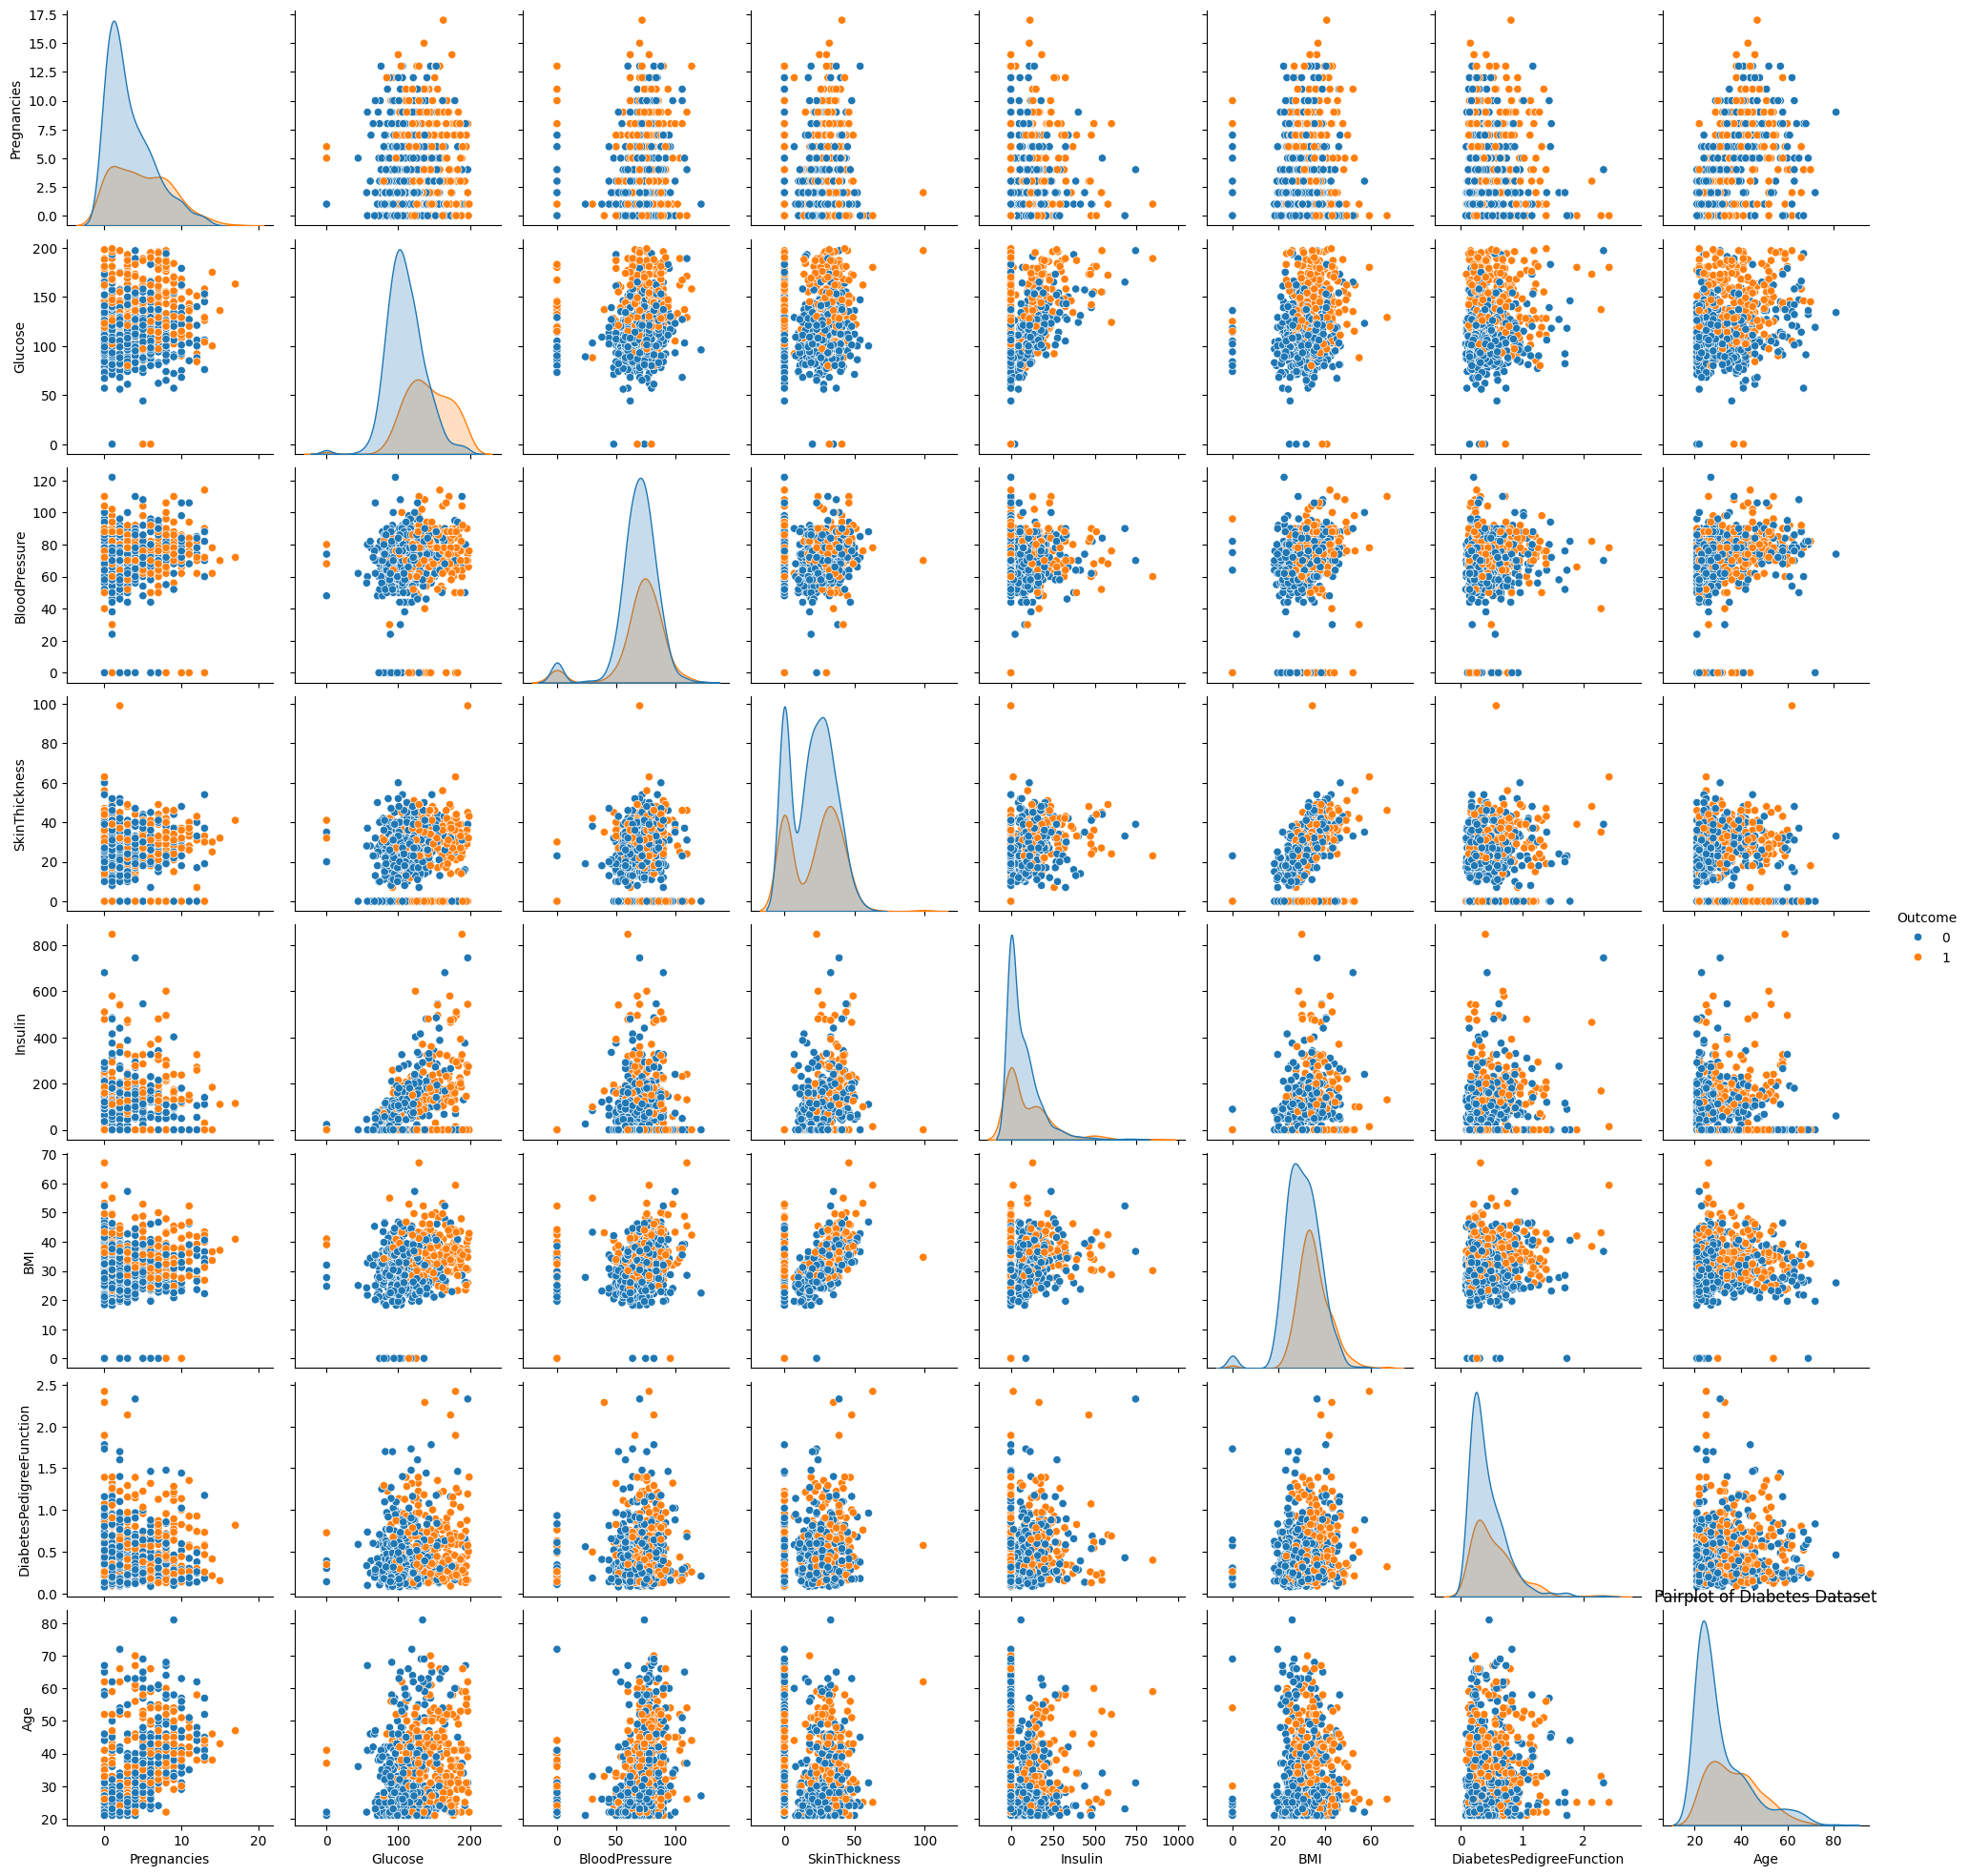

In [6]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.title('Pairplot of Diabetes Dataset')
plt.show()


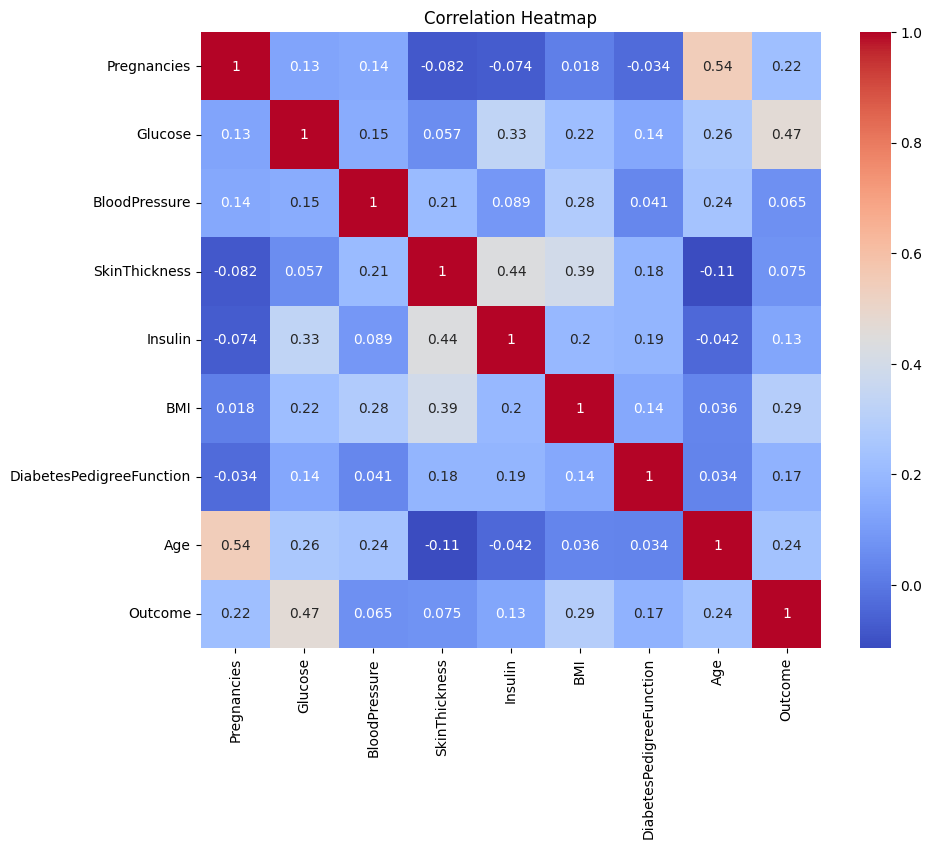

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

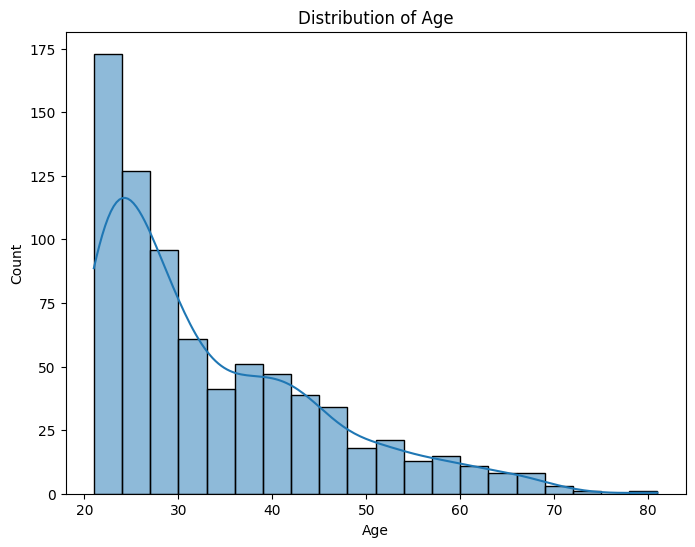

In [8]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

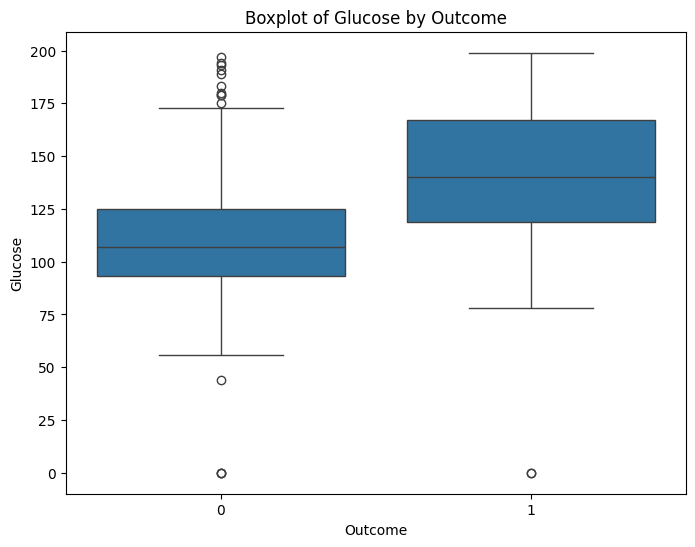

In [9]:
# Boxplot of Glucose by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Boxplot of Glucose by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

In [10]:
# Calculate Z-score for each column
z_scores = zscore(df)

# Define threshold for outlier detection
threshold = 3

# Find outliers
outliers = df[(z_scores > threshold).any(axis=1)]

print("Outliers:")
print(outliers)


Outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
45             0      180             66             39        0  42.0   
58             0      146             82              0        0  40.5   
88            15      136             70             32      110  37.1   
111            8      155             62             26      495  34.0   
123            5      132             80              0        0  26.8   
153            1      153             82             42      485  40.6   
159           17      163             72             41      114  40.9   
177            0      129            110             46      130  67.1   
186            8      181             68             36      495  30.1   
220            0      177   

In [11]:
# Calculate Z-score for each column
z_scores = zscore(df)

# Define threshold for outlier detection
threshold = 3

# Find outliers
outliers_index = df[(z_scores > threshold).any(axis=1)].index

# Remove outliers from DataFrame
clean_df = df.drop(outliers_index)

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(clean_df)


Cleaned DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  


In [12]:
clean_df.shape

(729, 9)

In [13]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               729 non-null    int64  
 1   Glucose                   729 non-null    int64  
 2   BloodPressure             729 non-null    int64  
 3   SkinThickness             729 non-null    int64  
 4   Insulin                   729 non-null    int64  
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  729 non-null    float64
 7   Age                       729 non-null    int64  
 8   Outcome                   729 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 57.0 KB


In [14]:
# Separate features (X) and target variable (y)
X = clean_df.drop('Outcome', axis=1)
y = clean_df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8013698630136986

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       102
           1       0.69      0.61      0.65        44

    accuracy                           0.80       146
   macro avg       0.77      0.75      0.76       146
weighted avg       0.80      0.80      0.80       146


Confusion Matrix:
[[90 12]
 [17 27]]


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)  # Add an extra dimension for binary classification

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tensor.numpy())
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define a neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define batch size and create data loaders
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test)
    predicted = (outputs >= 0.5).float()
    accuracy = (predicted == y_test).float().mean()
    print(f"Accuracy: {accuracy.item()*100:.2f}%")


Epoch [1/100], Loss: 0.6558
Epoch [2/100], Loss: 0.6277
Epoch [3/100], Loss: 0.5997
Epoch [4/100], Loss: 0.5722
Epoch [5/100], Loss: 0.5434
Epoch [6/100], Loss: 0.5211
Epoch [7/100], Loss: 0.5023
Epoch [8/100], Loss: 0.4877
Epoch [9/100], Loss: 0.4785
Epoch [10/100], Loss: 0.4717
Epoch [11/100], Loss: 0.4670
Epoch [12/100], Loss: 0.4631
Epoch [13/100], Loss: 0.4587
Epoch [14/100], Loss: 0.4561
Epoch [15/100], Loss: 0.4539
Epoch [16/100], Loss: 0.4526
Epoch [17/100], Loss: 0.4500
Epoch [18/100], Loss: 0.4495
Epoch [19/100], Loss: 0.4466
Epoch [20/100], Loss: 0.4462
Epoch [21/100], Loss: 0.4453
Epoch [22/100], Loss: 0.4419
Epoch [23/100], Loss: 0.4411
Epoch [24/100], Loss: 0.4404
Epoch [25/100], Loss: 0.4386
Epoch [26/100], Loss: 0.4372
Epoch [27/100], Loss: 0.4356
Epoch [28/100], Loss: 0.4345
Epoch [29/100], Loss: 0.4333
Epoch [30/100], Loss: 0.4321
Epoch [31/100], Loss: 0.4314
Epoch [32/100], Loss: 0.4300
Epoch [33/100], Loss: 0.4292
Epoch [34/100], Loss: 0.4283
Epoch [35/100], Loss: 0

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert data to numpy arrays
X = clean_df.drop('Outcome', axis=1).values
y = clean_df['Outcome'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')



Epoch 1/100
8/8 [==============================] - 3s 35ms/step - loss: 0.6984 - accuracy: 0.5558 - val_loss: 0.6637 - val_accuracy: 0.5726
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6570 - accuracy: 0.6631 - val_loss: 0.6417 - val_accuracy: 0.6581
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6261 - accuracy: 0.6674 - val_loss: 0.6239 - val_accuracy: 0.6325
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5987 - accuracy: 0.6867 - val_loss: 0.6071 - val_accuracy: 0.6410
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5734 - accuracy: 0.7167 - val_loss: 0.5904 - val_accuracy: 0.6581
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5483 - accuracy: 0.7382 - val_loss: 0.5719 - val_accuracy: 0.6410
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5256 - accuracy: 0.7597 - val_loss: 0.5560 - val_accuracy: 0.7009
Epoch 8/100
8/8 [=========